In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import csv

In [2]:
folder = "../../../data/surveys/responses/"
response_list = glob.glob(F"{folder}*")

folder = "../../../data/surveys/surveys/"
survey_list = [F"{folder}{lst[59:]}" for lst in response_list]

# df = pd.concat((pd.read_csv(f) for f in respons_list), ignore_index=True)

In [3]:
df_survey = pd.read_csv(survey_list[0], sep='\t')
df_survey.rename(columns={ df_survey.columns[0]: "Index" }, inplace = True)
df_response = pd.read_csv(response_list[0], header=None).iloc[: , 1:].T
df_response.rename(columns={ df_response.columns[0]: "Sentence", 
                            df_response.columns[1]: "Result" }, 
                            inplace = True)



In [4]:
# Surveys
df_surveys = pd.concat((pd.read_csv(f, sep='\t') for f in survey_list), ignore_index=True)
df_surveys.rename(columns={ df_surveys.columns[0]: "Index" }, inplace = True)

# Response
df_responses = pd.concat((pd.read_csv(f, header=None).iloc[: , 1:].T for f in response_list))
df_responses.rename(columns={ df_responses.columns[0]: "Sentence", 
                            df_responses.columns[1]: "Result" }, 
                            inplace = True)

# Merge
df = df_surveys
sentences = ["1", "2", "3", "4", "5"]
for number in sentences:
    df = df.merge(
        df_responses.add_suffix(F"_{number}"), left_on=number, right_on=F"Sentence_{number}",
        # suffixes=(F"_{number}", F"_{number}")
    )

# Drop columns
df = df.drop(columns=sentences)

# Total count
for choices in df_response["Result"].unique():
    df[choices] = df.apply(lambda x: x.str.contains(choices).sum(), axis=1)

### Viz

In [96]:
mpl.rcParams['text.color'] = 'white'
mpl.rcParams['axes.labelcolor'] = 'black'



In [56]:
df_plot = df[["Species",
              "Main Trait",
              "SIM",
              "Dataset",
              "Unrelated", "Correct Part/Organ", "Correct Part/Organ & Trait"]]

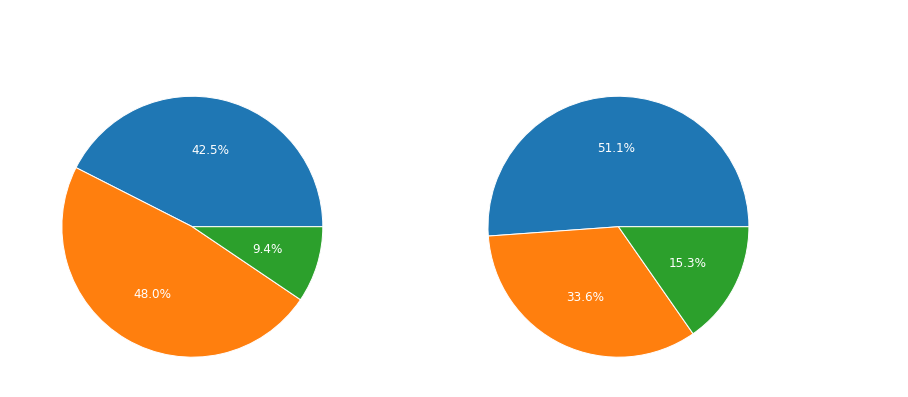

In [170]:
# ax = plt.subplots()
axes = df_plot.groupby(["Dataset"]).sum().T.plot(
            figsize=(14, 6),
            kind='pie',
            subplots=True, 
            # ax=ax,
            legend=None,
            autopct='%1.1f%%',
            wedgeprops={'linewidth': 1.0, 
                        'edgecolor': 'white'},
            textprops={'size': 'large'}
        )

for ax in axes:
    ax.set_aspect('equal')
    ax.yaxis.labelpad = 20
    ax.yaxis.set_label_coords(0.5, 1.1)
    ax.yaxis.label.set_color('white')
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_fontsize(25)


In [135]:
axes[0]

<AxesSubplot:ylabel='Palm'>